# Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python

# IMPORT THE PACKAGES

In [1]:
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import ipywidgets as widgets
from IPython.display import display
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT THE df DATA

In [2]:
# Reading the dataset
df=pd.read_csv(R"Advertising.csv")
df=df.drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# DATA CLEANING

In [3]:
# Check for missing values
print(df.isnull().sum())

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [4]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicate rows
df_duplicates_removed = df.drop_duplicates()


0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.shape

(200, 4)

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# HANDLE OUTLIERS

In [9]:
# Calculate the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TV           144.450
Radio         26.550
Newspaper     32.350
Sales          7.025
dtype: float64


In [15]:
# Printing columns
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [16]:
df.corr(method='pearson')


,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


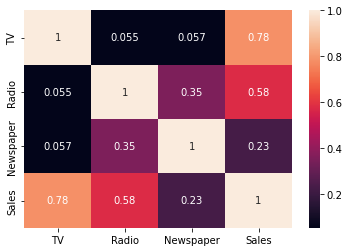

In [17]:
# Correlation heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True)
# Show the plots
plt.show()

# According to heatmap, The top highly Correlated attributes are:


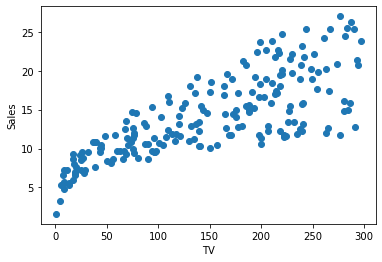

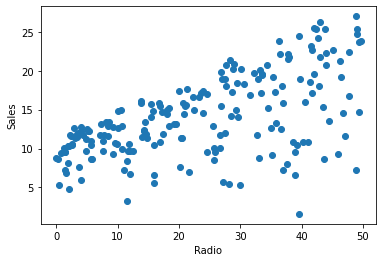

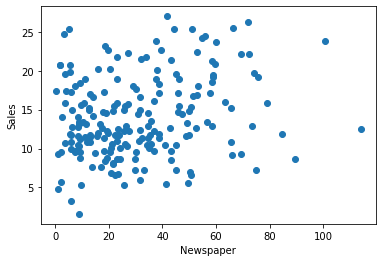

In [19]:
# Create a line chart of each column with 'Sales'
for col in df.columns:
    if col != 'Sales':
        plt.plot(df[col], df['Sales'], 'o')
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()

# Separate the features and target variable

In [59]:
import numpy as np
# Drop any additional columns besides 'TV', 'Radio', 'Newspaper', and 'Sales'
df = df[['TV', 'Radio', 'Newspaper', 'Sales']]

In [71]:
# Add polynomial terms for 'TV' and 'Radio'
df['TV_sq'] = df['TV']**2
df['Radio_sq'] = df['Radio']**2

# Add interaction term for 'TV' and 'Radio'
df['TV_Radio'] = df['TV'] * df['Radio']


In [72]:

# Create the feature matrix with the original features, polynomial terms, and interaction terms
X = df[['TV', 'Radio', 'Newspaper', 'TV_sq', 'Radio_sq', 'TV_Radio']]

# Create the y dataframe with the sales data
y = df[['Sales']].values


In [73]:
from sklearn.preprocessing import  StandardScaler
# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.96985227  0.98152247  1.77894547  0.94074774  0.91053374  1.55338931]
 [-1.19737623  1.08280781  0.66957876 -1.05779699  1.06810238 -0.51947782]
 [-1.51615499  1.52846331  1.78354865 -1.12384856  1.83424153 -0.80565807]
 ...
 [ 0.34981006 -0.942899   -1.11185242  0.09306959 -0.91836599 -0.55012816]
 [ 1.59456522  1.26512143  1.64085003  2.01844981  1.36717622  2.51195311]
 [ 0.99320602 -0.99016549 -1.00597925  0.97699668 -0.93543763 -0.44573503]]


# SPLITTING THE df DATA INTO TRAINING AND TESTING DATA

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the preprocessed data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (140, 6)
X_test shape: (60, 6)
y_train shape: (140, 1)
y_test shape: (60, 1)


# Create a Linear regressor model

In [75]:
# Fit a linear regression model with the interaction and polynomial terms as features
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Evaluate the performance of the model on the testing data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 0.3694112644010072


In [77]:
from sklearn.preprocessing import StandardScaler

# Define the scaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df[['TV', 'Radio', 'Newspaper','TV_sq', 'Radio_sq', 'TV_Radio']])



# DEALING WITH NEW DATA

In [78]:
# Use the scaled data to fit the model and make predictions
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['Sales'], test_size=0.3, random_state=42)

# create new data to predict on
new_data = [[100, 50, 25, 10000, 2500, 625]] # TV = 100, Radio = 50, Newspaper = 25

# apply the same scaler used on the training data
new_data_scaled = scaler.transform(new_data)

# pass the preprocessed new data to the model for prediction
y_pred = model.predict(new_data_scaled)

print("Predicted Sales: ", y_pred[0])

Predicted Sales:  [11.89522221]


C:\Users\bvst2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


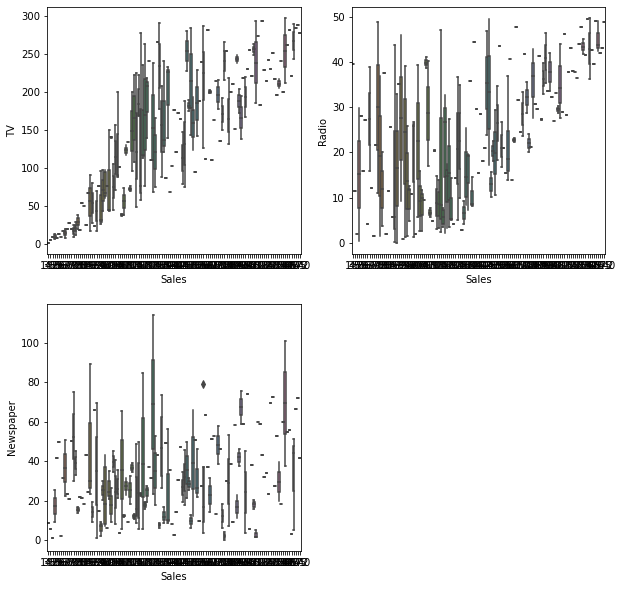

In [79]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt

def graph(y):
    sns.boxplot(x="Sales", y=y, data=df)

plt.figure(figsize=(10,10))
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('TV')

plt.subplot(222)
graph('Radio')

plt.subplot(223)
graph('Newspaper')


plt.show()


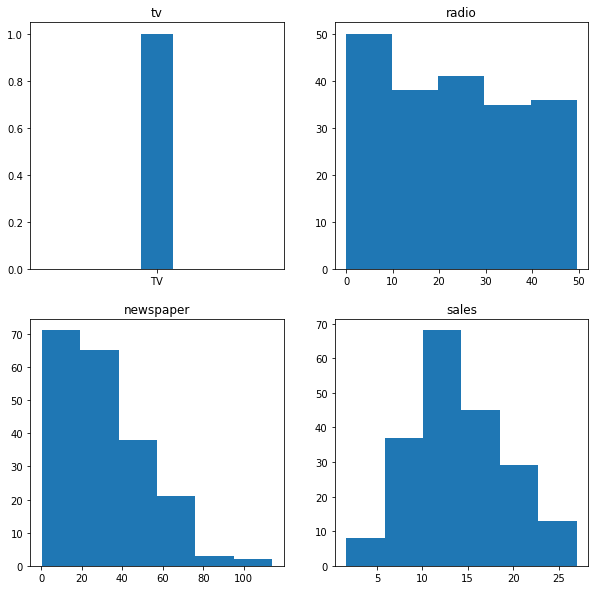

In [82]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("tv")
axes[0,0].hist(['TV'], bins=7)

axes[0,1].set_title("radio")
axes[0,1].hist(df['Radio'], bins=5);

axes[1,0].set_title("newspaper")
axes[1,0].hist(df['Newspaper'], bins=6);


axes[1,1].set_title("sales")
axes[1,1].hist(df['Sales'], bins=6);
